In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data loading
df_sale_items = pd.read_excel('/content/drive/MyDrive/Data Visualization/Class 2/data/online_retail.xlsx')
df_sale_items.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# some data pre-processing

# removing NaNs
df_sale_items.dropna(inplace=True)

# Type casting
df_sale_items.CustomerID = df_sale_items.CustomerID.astype(int)

# Data creation for aggregation
df_sale_items['sell_month'] = df_sale_items.InvoiceDate.dt.strftime('%Y-%m')

# Calculating sales amount
df_sale_items['total'] = df_sale_items.Quantity * df_sale_items.UnitPrice

# Removing negative values
df_sale_items = df_sale_items[df_sale_items['total'] > 0]

# Resorting columns
df_sale_items.columns = ['sale_id', 'product_id', 'description', 'amount', 
                          'sale_date', 'price','client_id', 'client_country', 
                          'sale_month', 'total']
df_sale_items = df_sale_items[['sale_id', 'sale_month', 'sale_date', 'client_id',
                                     'client_country', 'product_id', 'description',
                                     'amount', 'price', 'total']]
print(df_sale_items.dtypes)
df_sale_items.shape


sale_id                   object
sale_month                object
sale_date         datetime64[ns]
client_id                  int64
client_country            object
product_id                object
description               object
amount                     int64
price                    float64
total                    float64
dtype: object


(397884, 10)

In [5]:
df_sale_items.head(1)

,sale_id,sale_month,sale_date,client_id,client_country,product_id,description,amount,price,total
0,536365,2010-12,2010-12-01 08:26:00,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.3


In [6]:
# since every dataset instance represents a product, 
# let's agregate them to create the sale instance
df_sales = df_sale_items.groupby(['sale_month', 'client_id', 'client_country', 
                                 'sale_id']).agg({'total':['count', np.sum]})

# sorting indexes
df_sales = df_sales.sort_index().reset_index()

# sorting columns
df_sales.columns=['sale_month', 'client_id', 'client_country', 'sale_id', 
                  'items_amount', 'sale_value']

# removing month with missing data
df_sales = df_sales[df_sales['sale_month']!='2011-12']
print(df_sales.dtypes)

sale_month         object
client_id           int64
client_country     object
sale_id             int64
items_amount        int64
sale_value        float64
dtype: object


In [7]:
df_sales.head(1)

,sale_month,client_id,client_country,sale_id,items_amount,sale_value
0,2010-12,12347,Iceland,537626,31,711.79


## **Line graph visualization**

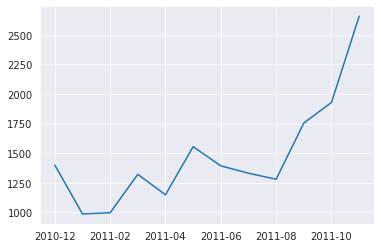

In [8]:
# visualizing the sales amount temporal series
sns.set_style("darkgrid")
df_sales.sale_month.value_counts().sort_index().plot()
plt.show()

   sale_month  sale_amount
0     2010-12         1400
1     2011-01          987
2     2011-02          997
3     2011-03         1321
4     2011-04         1149
5     2011-05         1555
6     2011-06         1393
7     2011-07         1331
8     2011-08         1280
9     2011-09         1755
10    2011-10         1929
11    2011-11         2657


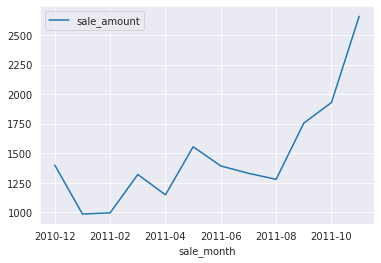

In [9]:
# another approach

df_sales_month = df_sales.sale_month.value_counts().sort_index()\
                .rename_axis('sale_month').reset_index(name='sale_amount')
print(df_sales_month)
df_sales_month.plot(x='sale_month')
plt.show()

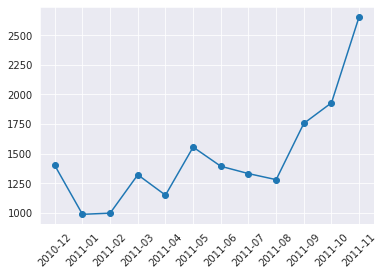

In [10]:
# another approach (old fashioned)
plt.plot(df_sales_month['sale_month'],
         df_sales_month['sale_amount'],
         marker='o')
plt.xticks(rotation = 45)
plt.show()

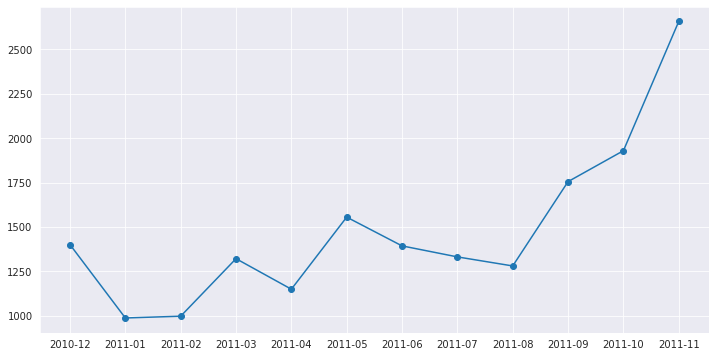

In [11]:
# increasing figure size
plt.figure(figsize=(12,6))
plt.plot(df_sales_month['sale_month'], df_sales_month['sale_amount'], marker='o')
# plt.xticks(rotation = 45)
plt.show()

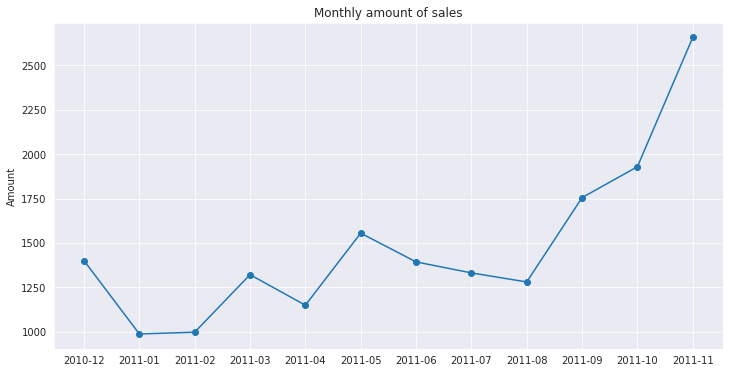

In [12]:
# adding title and labels
plt.figure(figsize=(12,6))
plt.title('Monthly amount of sales')
plt.ylabel('Amount')
plt.plot(df_sales_month['sale_month'], df_sales_month['sale_amount'], marker='o')
# plt.xticks(rotation = 45)
plt.show()

## **Circular graph visualization**

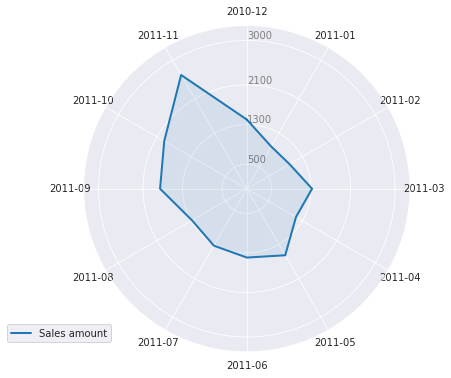

In [13]:
from math import pi

plt.figure(figsize=(12, 6))

# periods amount
categories = df_sales_month['sale_month']
N = len(categories)

# calculating the angles for the circular graph axis
angles = [n / float(N) * 2 * pi for n in range(N)]
# to close the circle
angles += angles[:1]

# graph initialization
ax = plt.subplot(111, polar=True)

# so that the first axis is on top
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# defining markers and X axis label
plt.xticks(angles[:-1], categories)

# defining Y axis labels
ax.set_rlabel_position(0)
plt.yticks([500, 1300, 2100, 3000], color="grey", size=10)
plt.ylim(0,3300)

# plotting 'sales amount'
values = df_sales_month['sale_amount'].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, label='Sales amount')
ax.fill(angles, values, alpha=0.1)

# adding legends
plt.legend(bbox_to_anchor=(0.1, 0.1))
plt.show()

## **Trend visualization with line graph**

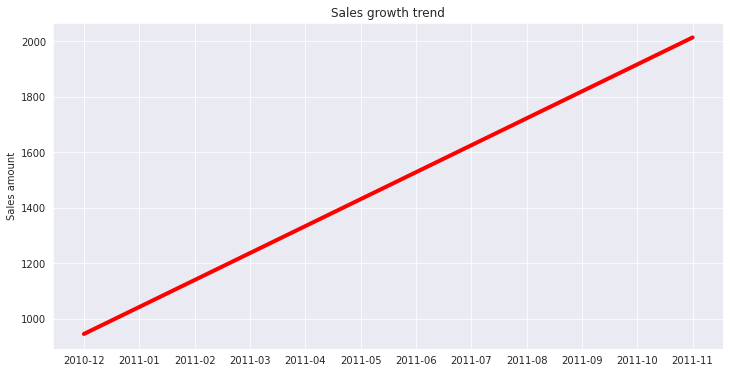

In [14]:
plt.figure(figsize=(12, 6))
plt.title('Sales growth trend')
plt.ylabel('Sales amount')

# calculating trend
x, y = range(0,12), df_sales_month['sale_amount']
z = np.polyfit(x, df_sales_month['sale_amount'], 1)
p = np.poly1d(z)

plt.plot(df_sales_month['sale_month'], p(x), c='r', linewidth = 4)
plt.show()

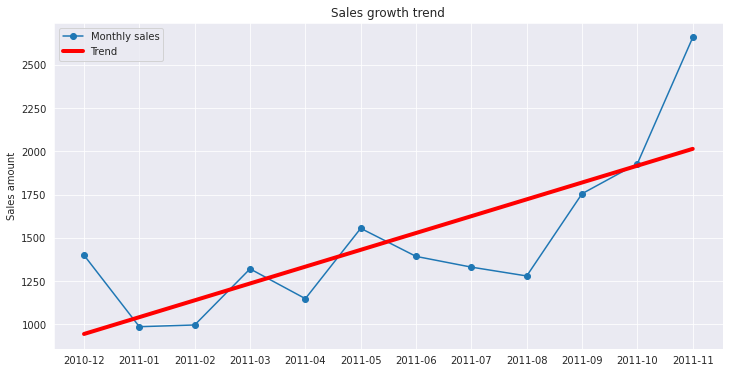

In [15]:
# improving trend graph showing the real sales amount
plt.figure(figsize=(12, 6))
plt.title('Sales growth trend')
plt.ylabel('Sales amount')

# calculating trend
x, y = range(0,12), df_sales_month['sale_amount']
z = np.polyfit(x, df_sales_month['sale_amount'], 1)
p = np.poly1d(z)

plt.plot(df_sales_month['sale_month'], df_sales_month['sale_amount'], marker='o', label='Monthly sales')
plt.plot(df_sales_month['sale_month'], p(x), c='r', linewidth = 4, label='Trend')
plt.legend()
plt.show()

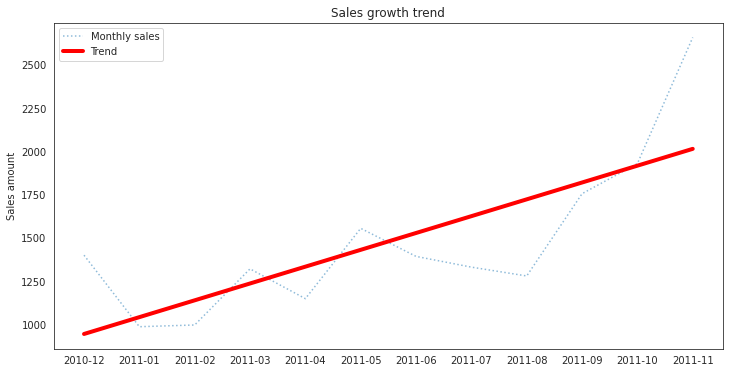

In [16]:
# highlighting the trend line

sns.set_style("white")

plt.figure(figsize=(12, 6))
plt.title('Sales growth trend')
plt.ylabel('Sales amount')

# calculating trend
x, y = range(0,12), df_sales_month['sale_amount']
z = np.polyfit(x, df_sales_month['sale_amount'], 1)
p = np.poly1d(z)

plt.plot(df_sales_month['sale_month'], df_sales_month['sale_amount'], label='Monthly sales', alpha=.5, ls=':')
plt.plot(df_sales_month['sale_month'], p(x), c='r', linewidth = 4, label='Trend')
plt.legend()
plt.show()

## **Visualizing total value and average ticket**

In [18]:
df_sales_month = df_sales.groupby('sale_month')\
          .agg({'sale_value':[len, np.sum, np.mean]})\
          .sort_index().reset_index()

df_sales_month.columns = ['sales_month', 'sales_amount', 
                          'sales_value', 'average_ticket']

df_sales_month

,sales_month,sales_amount,sales_value,average_ticket
0,2010-12,1400.0,572713.890,409.081350
1,2011-01,987.0,569445.040,576.945329
2,2011-02,997.0,447137.350,448.482798
3,2011-03,1321.0,595500.760,450.795428
4,2011-04,1149.0,469200.361,408.355406
5,2011-05,1555.0,678594.560,436.395215
6,2011-06,1393.0,661213.690,474.668837
7,2011-07,1331.0,600091.011,450.857258
8,2011-08,1280.0,645343.900,504.174922
9,2011-09,1755.0,952838.382,542.927853


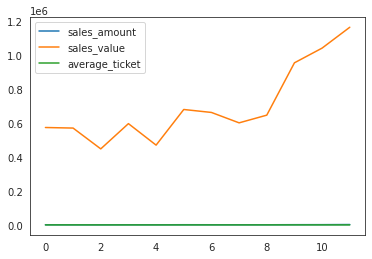

In [19]:
df_sales_month.plot()
plt.show()

# though, there are thre lines, we can see only 2

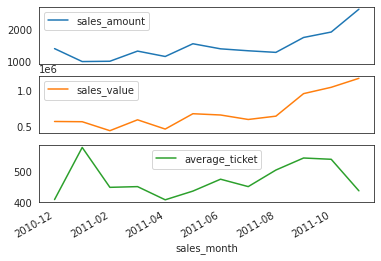

In [21]:
# let's solve the scale problem in the Y axis
df_sales_month.plot(subplots=True, x='sales_month')
plt.show()

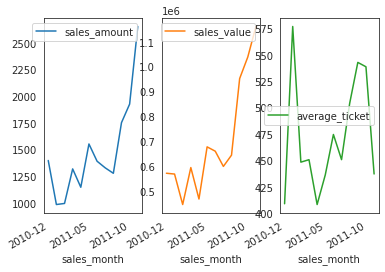

In [22]:
# another approach
df_sales_month.plot(subplots=True, x='sales_month', layout=(1,3))
plt.show()

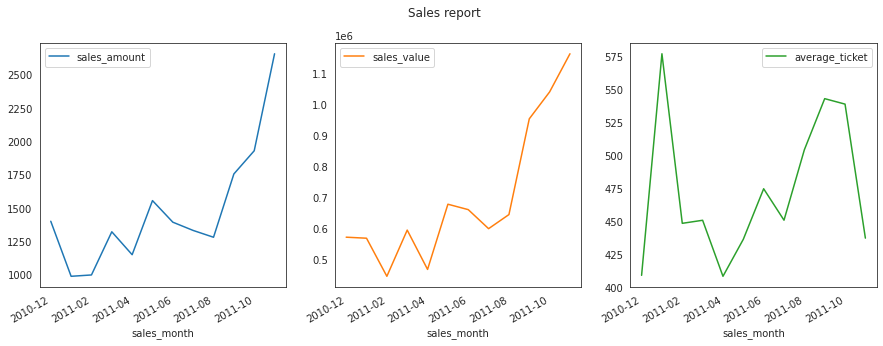

In [25]:
# another approach, bigger figure size
df_sales_month.plot(subplots=True, x='sales_month', layout=(1,3), figsize=(15,5), title='Sales report')
plt.show()

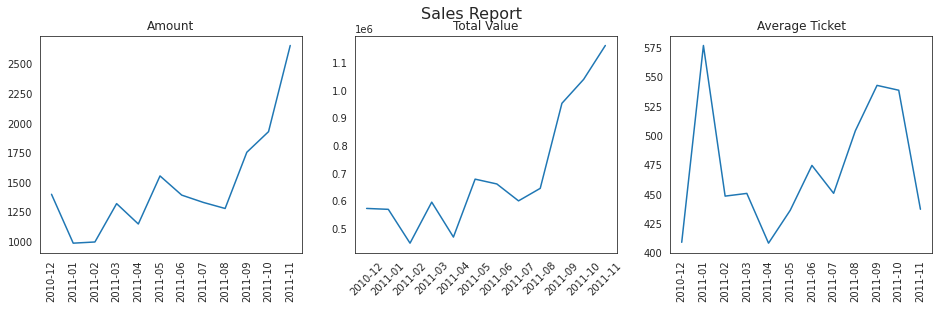

In [28]:
# using more of matplotlib
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Sales Report', fontsize=16)
axes[0].plot(df_sales_month['sales_month'], df_sales_month['sales_amount'])
axes[0].set_title('Amount')
axes[0].set_xticklabels(df_sales_month['sales_month'], rotation=90)

axes[1].plot(df_sales_month['sales_month'], df_sales_month['sales_value'])
axes[1].set_title('Total Value')
axes[1].set_xticklabels(df_sales_month['sales_month'], rotation=45)

axes[2].plot(df_sales_month['sales_month'], df_sales_month['average_ticket'])
axes[2].set_title('Average Ticket')
axes[2].set_xticklabels(df_sales_month['sales_month'], rotation=90)
plt.show()

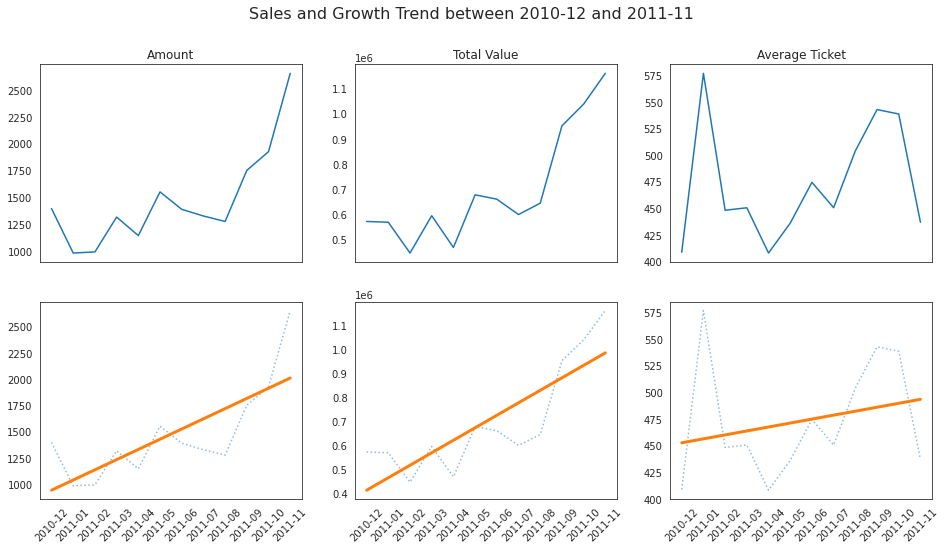

In [35]:
# showing also the trend graph

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle('Sales and Growth Trend between 2010-12 and 2011-11', fontsize=16)
axes[0][0].plot(df_sales_month['sales_month'], df_sales_month['sales_amount'])
axes[0][0].set_title('Amount')
axes[0][0].set_xticklabels([])

axes[0][1].plot(df_sales_month['sales_month'], df_sales_month['sales_value'])
axes[0][1].set_title('Total Value')
axes[0][1].set_xticklabels([])

axes[0][2].plot(df_sales_month['sales_month'], df_sales_month['average_ticket'])
axes[0][2].set_title('Average Ticket')
axes[0][2].set_xticklabels([])

x, y = range(1, 13), df_sales_month['sales_amount']
z = np.polyfit(x, df_sales_month['sales_amount'], 1)
p = np.poly1d(z)
axes[1][0].plot(df_sales_month['sales_month'], df_sales_month['sales_amount'], ls=':', alpha=.5, label='Sales Amount')
axes[1][0].plot(p(x), linewidth = 3, label='Trend')
axes[1][0].set_xticklabels(df_sales_month['sales_month'], rotation=45)

x, y = range(0, 12), df_sales_month['sales_value']
z = np.polyfit(x, df_sales_month['sales_value'], 1)
p = np.poly1d(z)
axes[1][1].plot(df_sales_month['sales_month'], df_sales_month['sales_value'], ls=':', alpha=.5, label='Total Value')
axes[1][1].plot(p(x), linewidth = 3, label='Trend')
axes[1][1].set_xticklabels(df_sales_month['sales_month'], rotation=45)

x, y = range(0, 12), df_sales_month['average_ticket']
z = np.polyfit(x, df_sales_month['average_ticket'], 1)
p = np.poly1d(z)
axes[1][2].plot(df_sales_month['sales_month'], df_sales_month['average_ticket'], ls=':', alpha=.5, label='Average Ticket')
axes[1][2].plot(p(x), linewidth = 3, label='Trend')
axes[1][2].set_xticklabels(df_sales_month['sales_month'], rotation=45)

plt.show()

## **Visualize Sales by Country**

In [36]:
df_sales.head(1)

,sale_month,client_id,client_country,sale_id,items_amount,sale_value
0,2010-12,12347,Iceland,537626,31,711.79


In [39]:
df_sales_country = df_sales.groupby(['client_country'])\
                      .agg({'sale_value':['count', np.sum]})\
                      .reset_index()
df_sales_country.columns = ['country', 'sales_amount', 'sales_value']
df_sales_country.head(7)

,country,sales_amount,sales_value
0,Australia,57,138521.31
1,Austria,16,9515.48
2,Bahrain,2,548.40
3,Belgium,94,39778.61
4,Brazil,1,1143.60
5,Canada,6,3666.38
6,Channel Islands,25,20252.04


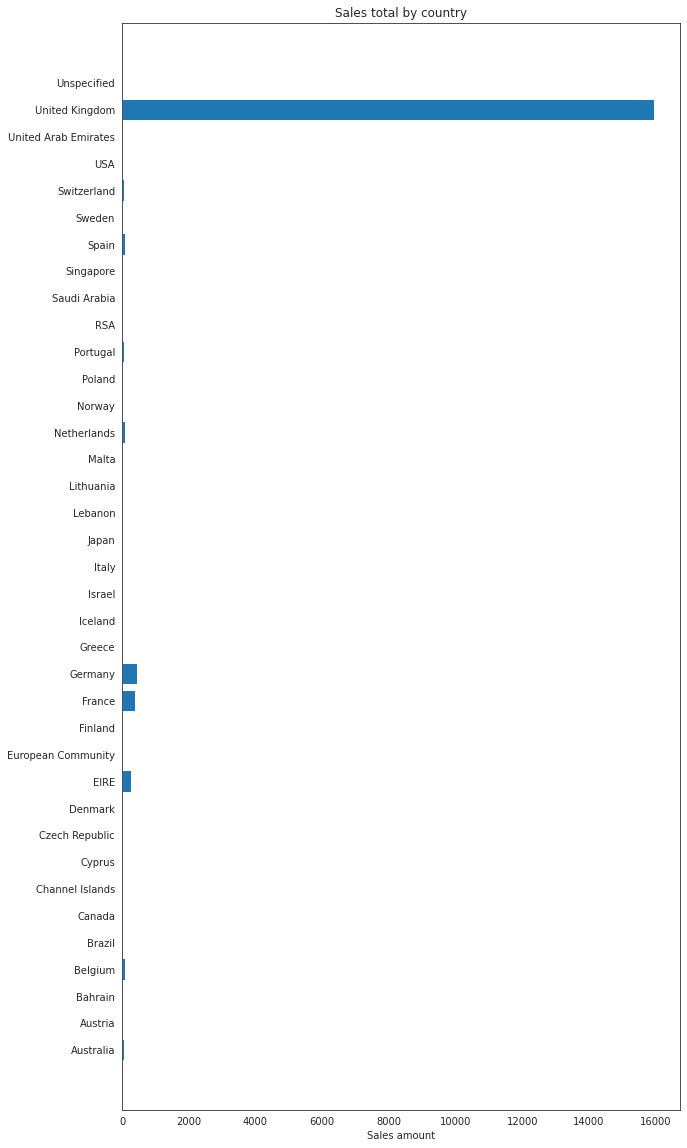

In [41]:
# Plotting graph
plt.figure(figsize=(10, 20))
plt.title('Sales amount by country')
plt.xlabel('Sales amount')

# Bar graph
plt.barh(df_sales_country['country'], df_sales_country['sales_amount'])
plt.show()

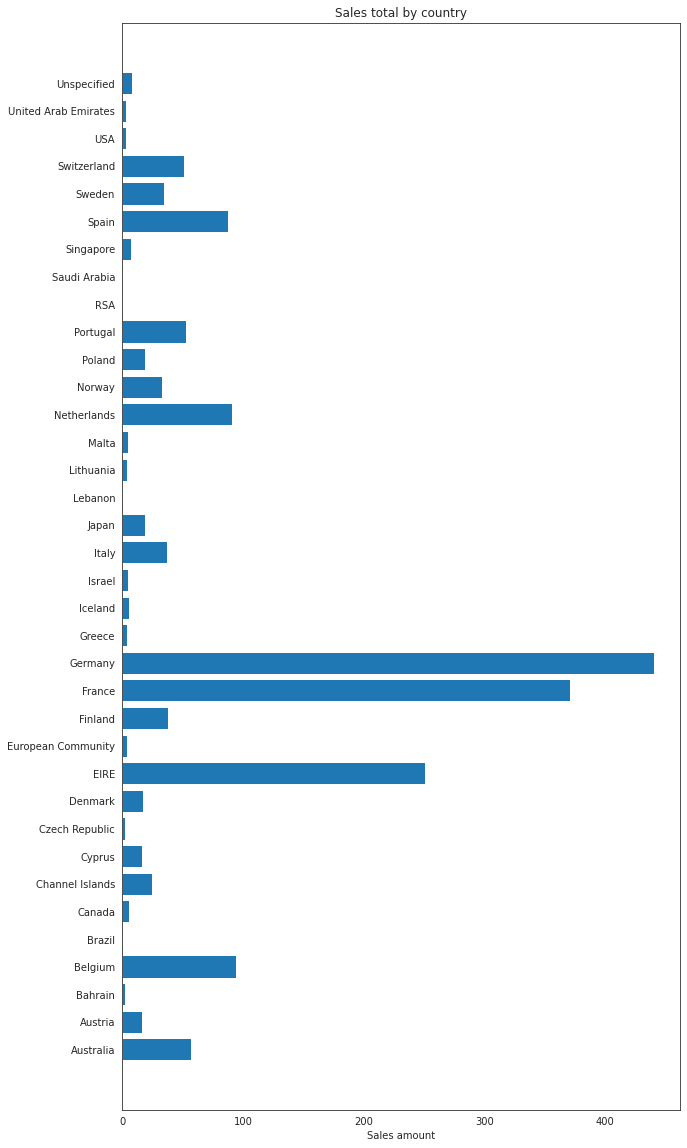

In [42]:
# UK is overshadowing other countries, let's remove it
df_sales_country = df_sales_country[df_sales_country['country']!='United Kingdom']

plt.figure(figsize=(10,20))
plt.title('Sales amount by country')
plt.xlabel('Sales amount')

# Bar graph
plt.barh(df_sales_country['country'], df_sales_country['sales_amount'])
plt.show()

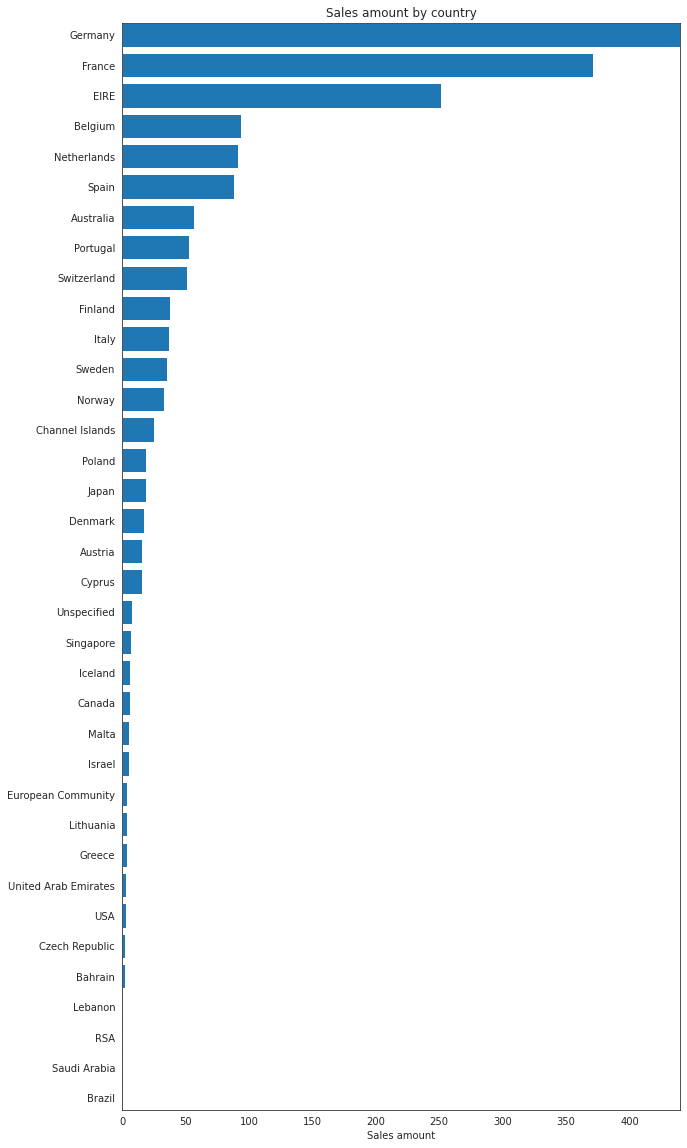

In [44]:
# sorting data
df_sales_country = df_sales_country.sort_values('sales_amount')
plt.figure(figsize=(10, 20))
plt.title('Sales amount by country')
plt.xlabel('Sales amount')

# Bar graph
plt.barh(df_sales_country['country'], df_sales_country['sales_amount'])
plt.margins(0,0)
plt.show()

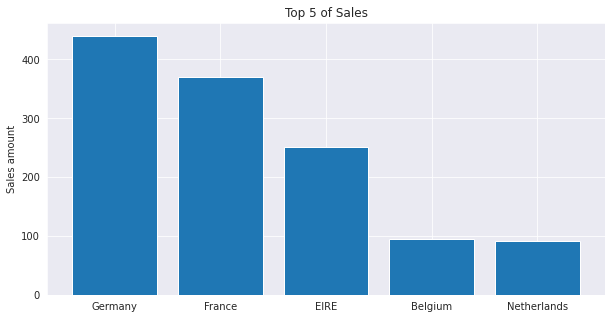

In [46]:
# Visualizing only the Top 5

sns.set_style("darkgrid")

df_sales_country_top5 = df_sales_country[-5:]
df_sales_country_top5 = df_sales_country_top5.sort_values('sales_amount', ascending=False)

plt.figure(figsize=(10, 5))
plt.title('Top 5 of Sales')
plt.ylabel('Sales amount')
plt.bar(df_sales_country_top5['country'], df_sales_country_top5['sales_amount'])
plt.show()

## **Visualize Sales by Top 5 Country during the Last Quarter**

In [48]:
# create dataframe of monthly sales by country
df_sales_month_country = df_sales.groupby(['sale_month', 'client_country'])\
                            .agg({'sale_value':'count'})\
                            .reset_index()

df_sales_month_country.columns = ['sales_month', 'country', 'sales_amount']
df_sales_month_country

,sales_month,country,sales_amount
0,2010-12,Australia,3
1,2010-12,Austria,1
2,2010-12,Belgium,5
3,2010-12,Channel Islands,1
4,2010-12,Cyprus,1
...,...,...,...
264,2011-11,Portugal,10
265,2011-11,Spain,14
266,2011-11,Sweden,5
267,2011-11,Switzerland,6


In [52]:
# filtering the last quarter
df_sales_month_country_top5 = df_sales_month_country[df_sales_month_country['country']\
                                                     .isin(df_sales_country_top5['country'])]

df_sales_month_country_top5 = df_sales_month_country_top5.sort_values(['sales_month', 'country'])

df_sales_month_country_top5_quarter = \
    df_sales_month_country_top5[df_sales_month_country_top5['sales_month']>='2011-09']
df_sales_month_country_top5_quarter

,sales_month,country,sales_amount
204,2011-09,Belgium,7
208,2011-09,EIRE,36
210,2011-09,France,45
211,2011-09,Germany,41
214,2011-09,Netherlands,7
225,2011-10,Belgium,11
230,2011-10,EIRE,31
232,2011-10,France,35
233,2011-10,Germany,58
238,2011-10,Netherlands,15


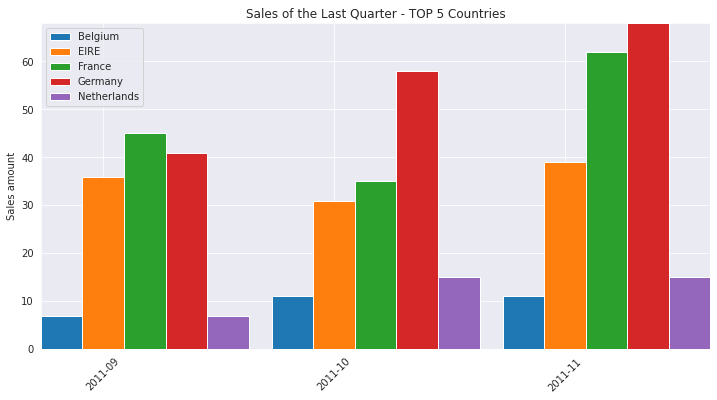

In [54]:
# plotting aggregated columns
plt.figure(figsize=(12, 6))
barWidth = 0.18
x_pos = bar = []
months = df_sales_month_country_top5_quarter['sales_month'].unique()
countries = df_sales_month_country_top5_quarter['country'].unique()

for i, country in enumerate(countries):
  bar = df_sales_month_country_top5_quarter[df_sales_month_country_top5_quarter['country']==country]['sales_amount'].values
  if i==0:
    x_pos = np.arange(len(bar))
  else:
    x_pos = [x + barWidth for x in x_pos]
  plt.bar(x_pos, bar, width=barWidth, label=country)

plt.xticks([r + barWidth for r in range(len(months))], months)
plt.xticks(rotation = 45)
plt.margins(0, 0)
plt.title('Sales of the Last Quarter - TOP 5 Countries')
plt.ylabel('Sales amount')
plt.legend()
plt.show()

In [55]:
# plot using Pandas
data = {}
for country in df_sales_month_country_top5_quarter['country'].unique():
  data[country] = df_sales_month_country_top5_quarter[df_sales_month_country_top5_quarter['country']==country]['sales_amount'].values
df_temp = pd.DataFrame(data, index=df_sales_month_country_top5_quarter['sales_month'].unique())
df_temp

,Belgium,EIRE,France,Germany,Netherlands
2011-09,7,36,45,41,7
2011-10,11,31,35,58,15
2011-11,11,39,62,68,15


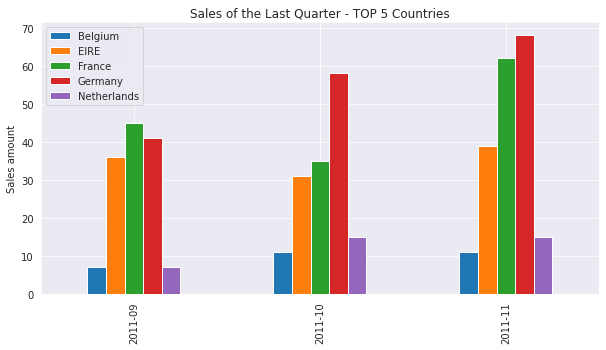

In [56]:
df_temp.plot(figsize=(10,5), kind='bar')
plt.title('Sales of the Last Quarter - TOP 5 Countries')
plt.ylabel('Sales amount')
plt.show()

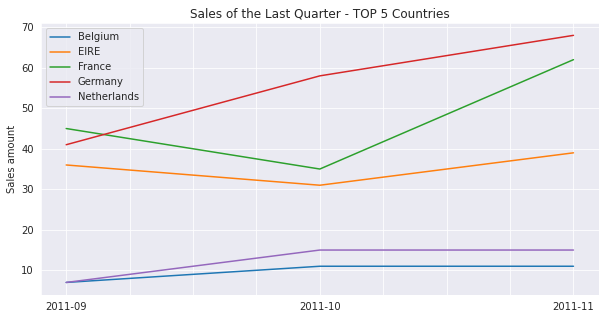

In [57]:
# plotting Line Graph using Pandas
df_temp.plot(figsize=(10,5))
plt.title('Sales of the Last Quarter - TOP 5 Countries')
plt.ylabel('Sales amount')
plt.show()

## **Visualize Sales by Top 10 Country during the Last Quarter**

In [60]:
countries_top_10 = df_sales_country[df_sales_country['sales_amount']<100].sort_values(['sales_amount'], ascending=False)[:10]
countries_top_10

,country,sales_amount,sales_value
3,Belgium,94,39778.61
23,Netherlands,91,273718.32
30,Spain,88,61260.90
0,Australia,57,138521.31
26,Portugal,53,30631.70
32,Switzerland,51,56443.95
12,Finland,38,21313.32
18,Italy,37,17282.79
31,Sweden,35,38140.33
24,Norway,33,33379.74


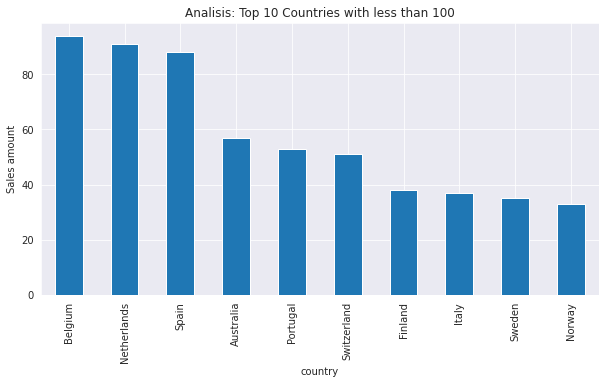

In [63]:
countries_top_10.plot(x='country', y='sales_amount', kind='bar', figsize=(10,5), legend=False)
plt.title('Analisis: Top 10 Countries with less than 100')
plt.ylabel('Sales amount')
plt.show()

In [64]:
# filtering the last quarter sales
df_top_10_quarter = df_sales_month_country[(df_sales_month_country['country'].isin(countries_top_10['country'])) &
                                           (df_sales_month_country['sales_month']>='2011-09')]
print(df_top_10_quarter.shape)
df_top_10_quarter

(30, 3)


,sales_month,country,sales_amount
203,2011-09,Australia,8
204,2011-09,Belgium,7
209,2011-09,Finland,4
212,2011-09,Italy,1
214,2011-09,Netherlands,7
215,2011-09,Norway,6
217,2011-09,Portugal,3
218,2011-09,Spain,8
219,2011-09,Sweden,3
220,2011-09,Switzerland,7


In [65]:
data = {}
for country in df_top_10_quarter['country'].unique():
  data[country] = df_top_10_quarter[df_top_10_quarter['country']==country]['sales_amount'].values
df_temp = pd.DataFrame(data, index=df_top_10_quarter['sales_month'].unique())
df_temp

,Australia,Belgium,Finland,Italy,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland
2011-09,8,7,4,1,7,6,3,8,3,7
2011-10,4,11,6,7,15,7,9,8,3,6
2011-11,6,11,8,9,15,5,10,14,5,6


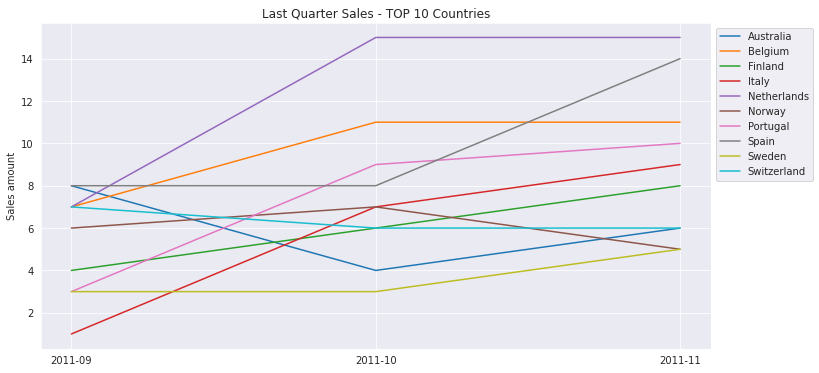

In [66]:
# plotting line graph

plt.figure(figsize=(12, 6))
for country in df_temp.columns.values:
  plt.plot(df_temp.index.values, df_temp[country], label=country)
plt.title('Last Quarter Sales - TOP 10 Countries')
plt.ylabel('Sales amount')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

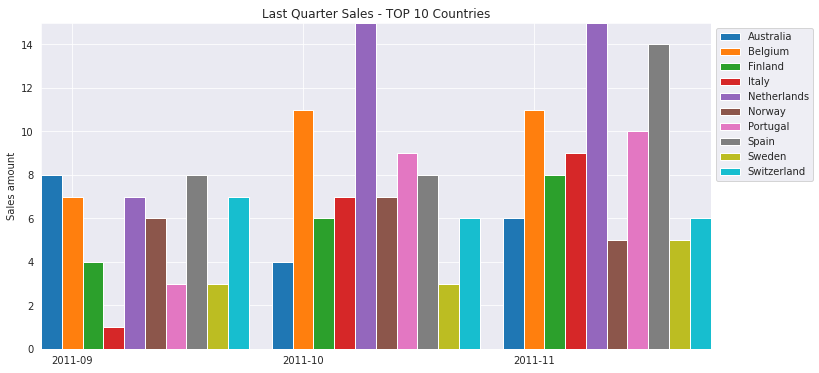

In [68]:
# plotting bar graph
plt.figure(figsize=(12, 6))
barWidth = 0.09
x_pos = bar = []
months = df_temp.index.values
countries = df_temp.columns.values

for i, country in enumerate(countries):
  bar = df_temp[country]
  if i==0:
    x_pos = np.arange(len(bar))
  else:
    x_pos = [x + barWidth for x in x_pos]
  plt.bar(x_pos, bar, width=barWidth, label=country)

plt.xticks([r + barWidth for r in range(len(months))], months)
# plt.xticks(rotation = 45)
plt.margins(0,0)
plt.title('Last Quarter Sales - TOP 10 Countries')
plt.ylabel('Sales amount')
plt.legend(bbox_to_anchor=(1,1))
plt.show()